### Installation

In [1]:
%%capture
import os
os.environ["UNSLOTH_VLLM_STANDBY"] = "1" # [NEW] Extra 30% context lengths!


### Unsloth

微调模型让他能够对齐格式

In [2]:
import os
os.environ['UNSLOTH_VLLM_STANDBY'] = "1" # Unsloth standby saves 30%+ memory for RL
from unsloth import FastLanguageModel
import torch
max_seq_length = 4096 # Can increase for longer reasoning traces
lora_rank = 32 # Larger rank = smarter, but slower

model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "/root/autodl-tmp/models/Qwen3-1.7B",
    max_seq_length = max_seq_length,
    load_in_4bit = False, # False for LoRA 16bit
    fast_inference = True, # Enable vLLM fast inference
    max_lora_rank = lora_rank,
    gpu_memory_utilization = 0.5,
)

model = FastLanguageModel.get_peft_model(
    model,
    r = lora_rank, # Choose any number > 0 ! Suggested 8, 16, 32, 64, 128
    target_modules = [
        "q_proj", "k_proj", "v_proj", "o_proj",
        "gate_proj", "up_proj", "down_proj",
    ],
    lora_alpha = lora_rank*2, # *2 speeds up training
    use_gradient_checkpointing = "unsloth", # Reduces memory usage
    random_state = 3407,
)

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!
WARNING 12-24 21:47:59 [vllm.py:1403] Current vLLM config is not set.
INFO 12-24 21:47:59 [scheduler.py:230] Chunked prefill is enabled with max_num_batched_tokens=2048.
INFO 12-24 21:47:59 [vllm_utils.py:702] Unsloth: Patching vLLM v1 graph capture
==((====))==  Unsloth 2025.12.8: Fast Qwen3 patching. Transformers: 4.57.3. vLLM: 0.13.0.
   \\   /|    NVIDIA GeForce RTX 5090. Num GPUs = 1. Max memory: 31.357 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.9.0+cu128. CUDA: 12.0. CUDA Toolkit: 12.8. Triton: 3.5.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.33.post2. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!
Unsloth: Standby mode is enabled. Changing `gpu_memory_utilization` to 0.855.
Unsloth: vLLM loading /root/autodl-tmp/models/Qw

/root/miniconda3/lib/python3.12/site-packages/pydantic/type_adapter.py:605: UserWarning: Pydantic serializer warnings:
  PydanticSerializationUnexpectedValue(Expected `enum` - serialized value may not be as expected [field_name='mode', input_value=3, input_type=int])
  return self.serializer.to_python(


INFO 12-24 21:48:03 [scheduler.py:230] Chunked prefill is enabled with max_num_batched_tokens=6144.
INFO 12-24 21:48:04 [core.py:93] Initializing a V1 LLM engine (v0.13.0) with config: model='/root/autodl-tmp/models/Qwen3-1.7B', speculative_config=None, tokenizer='/root/autodl-tmp/models/Qwen3-1.7B', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.bfloat16, max_seq_len=4096, download_dir=None, load_format=auto, tensor_parallel_size=1, pipeline_parallel_size=1, data_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, device_config=cuda, structured_outputs_config=StructuredOutputsConfig(backend='auto', disable_fallback=False, disable_any_whitespace=False, disable_additional_properties=False, reasoning_parser='', reasoning_parser_plugin='', enable_in_reasoning=False), observability_config=ObservabilityConfig(show_hidden_metrics_for_version=None, otlp_trac

/root/miniconda3/lib/python3.12/site-packages/pydantic/type_adapter.py:605: UserWarning: Pydantic serializer warnings:
  PydanticSerializationUnexpectedValue(Expected `enum` - serialized value may not be as expected [field_name='mode', input_value=3, input_type=int])
  return self.serializer.to_python(


INFO 12-24 21:48:04 [topk_topp_sampler.py:47] Using FlashInfer for top-p & top-k sampling.
INFO 12-24 21:48:04 [gpu_model_runner.py:3562] Starting to load model /root/autodl-tmp/models/Qwen3-1.7B...
INFO 12-24 21:48:05 [cuda.py:315] Using AttentionBackendEnum.FLASHINFER backend.


Loading safetensors checkpoint shards:   0% Completed | 0/2 [00:00<?, ?it/s]


INFO 12-24 21:48:05 [default_loader.py:308] Loading weights took 0.65 seconds
INFO 12-24 21:48:05 [punica_selector.py:20] Using PunicaWrapperGPU.
INFO 12-24 21:48:06 [gpu_model_runner.py:3659] Model loading took 3.2804 GiB memory and 0.814850 seconds
INFO 12-24 21:48:13 [backends.py:643] Using cache directory: /root/.cache/vllm/torch_compile_cache/a19651f6db/rank_0_0/backbone for vLLM's torch.compile
INFO 12-24 21:48:13 [backends.py:703] Dynamo bytecode transform time: 6.98 s
INFO 12-24 21:48:18 [backends.py:226] Directly load the compiled graph(s) for compile range (1, 6144) from the cache, took 0.547 s
INFO 12-24 21:48:18 [monitor.py:34] torch.compile takes 7.52 s in total
INFO 12-24 21:48:18 [gpu_worker.py:375] Available KV cache memory: 22.67 GiB
INFO 12-24 21:48:19 [kv_cache_utils.py:1291] GPU KV cache size: 212,256 tokens
INFO 12-24 21:48:19 [kv_cache_utils.py:1296] Maximum concurrency for 4,096 tokens per request: 51.82x
INFO 12-24 21:48:19 [kernel_warmup.py:65] Warming up Flash

Capturing CUDA graphs (mixed prefill-decode, PIECEWISE):   0%|          | 0/46 [00:00<?, ?it/s]

WARNING 12-24 21:48:19 [utils.py:250] Using default LoRA kernel configs


Capturing CUDA graphs (mixed prefill-decode, PIECEWISE): 100%|██████████| 46/46 [00:02<00:00, 18.70it/s]
Capturing CUDA graphs (decode, FULL): 100%|██████████| 26/26 [00:01<00:00, 20.44it/s]

INFO 12-24 21:48:23 [gpu_model_runner.py:4587] Graph capturing finished in 4 secs, took 0.42 GiB
INFO 12-24 21:48:23 [vllm_utils.py:714] Unsloth: Patched vLLM v1 graph capture finished in 4 secs.


INFO 12-24 21:48:23 [core.py:259] init engine (profile, create kv cache, warmup model) took 17.44 seconds
INFO 12-24 21:48:24 [llm.py:360] Supported tasks: ('generate',)
Unsloth: Standby mode is enabled. Pre-sleeping vLLM model to reduce OOMs.
INFO 12-24 21:48:24 [abstract.py:306] It took 0.052950 seconds to fall asleep.
Unsloth: Just some info: will skip parsing ['post_feedforward_layernorm', 'ffn_norm', 'norm2', 'pre_feedforward_layernorm', 'layer_norm2', 'layer_norm1', 'norm1', 'input_layernorm', 'attention_norm', 'post_attention_layernorm', 'k_norm', 'q_norm', 'norm', 'post_layernorm']


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Performing substitution for additional_keys=set()
Unsloth: Just some info: will skip parsing ['post_feedforward_layernorm', 'ffn_norm', 'norm2', 'pre_feedforward_layernorm', 'layer_norm2', 'cross_attn_input_layernorm', 'layer_norm1', 'norm1', 'input_layernorm', 'attention_norm', 'post_attention_layernorm', 'k_norm', 'cross_attn_post_attention_layernorm', 'q_norm', 'norm', 'post_layernorm']


Unsloth 2025.12.8 patched 28 layers with 28 QKV layers, 28 O layers and 28 MLP layers.


Let's call the model without doing any RL / GRPO:

In [3]:
# messages = [
#     {"role": "user", "content": "Solve x^5 + 3x^4 - 10 = 3."},
# ]
# inputs = tokenizer.apply_chat_template(
#     messages,
#     add_generation_prompt = True,
#     return_tensors = "pt",
#     return_dict = True,
#     reasoning_effort = "low",
# ).to(model.device)
# from transformers import TextStreamer
# _ = model.generate(**inputs, max_new_tokens = 512, use_cache=True, streamer = TextStreamer(tokenizer))

In [4]:
# text = "What is the sqrt of 101?"

# from vllm import SamplingParams
# sampling_params = SamplingParams(
#     temperature = 1.0,
#     top_k = 50,
#     max_tokens = 512,
# )
# output = model.fast_generate(
#     [text],
#     sampling_params = sampling_params,
#     lora_request = None,
# )[0].outputs[0].text

# output

chat template


In [5]:
reasoning_start = "<start_deepthink>"
reasoning_end   = "<end_deepthink>"
solution_start  = "<SOLUTION>"
solution_end    = "</SOLUTION>"

system_prompt = \
f"""User asks a question, and the Assistant solves it.

Format requirements:
1. Enclose the reasoning process within {reasoning_start} ... {reasoning_end}.
2. Enclose the final answer within {solution_start} ... {solution_end}.

Constraints on the Answer:
- For numerical answers, use digits (e.g., 42).
- For fractions or algebraic expressions, use standard LaTeX format (e.g., \\frac{{1}}{{2}}, 2x+5).
- Output NOTHING else inside the solution tags except the value itself.
"""
system_prompt

'User asks a question, and the Assistant solves it.\n\nFormat requirements:\n1. Enclose the reasoning process within <start_deepthink> ... <end_deepthink>.\n2. Enclose the final answer within <SOLUTION> ... </SOLUTION>.\n\nConstraints on the Answer:\n- For numerical answers, use digits (e.g., 42).\n- For fractions or algebraic expressions, use standard LaTeX format (e.g., \\frac{1}{2}, 2x+5).\n- Output NOTHING else inside the solution tags except the value itself.\n'

In [6]:
# 1. 定义更安全的 ChatML 格式模板
chat_template = (
    "{% if messages[0]['role'] == 'system' %}"
        "{{ '<|im_start|>system\n' + messages[0]['content'] + '<|im_end|>\n' }}"
        "{% set loop_messages = messages[1:] %}"
    "{% else %}"
        # 关键修改：直接把 system_prompt 放在这里，不要包裹在 {{ '...' }} 里
        "<|im_start|>system\n{system_prompt}<|im_end|>\n"
        "{% set loop_messages = messages %}"
    "{% endif %}"
    "{% for message in loop_messages %}"
        "{{ '<|im_start|>' + message['role'] + '\n' + message['content'] + '<|im_end|>\n' }}"
    "{% endfor %}"
    "{% if add_generation_prompt %}"
        # 这里的 reasoning_start 通常比较短且无引号，放在里面一般没问题，
        # 但为了统一，也可以移出来，不过放在里面能保证结构紧凑
        "{{ '<|im_start|>assistant\n{reasoning_start}' }}"
    "{% endif %}"
)

# 2. 注入变量 (保持不变)
# 现在即使 system_prompt 里有单引号、换行或 LaTeX 花括号，因为它们在 Jinja 标签之外，
# 会被视为纯文本，绝对安全。
chat_template = chat_template.replace("{system_prompt}", system_prompt)
chat_template = chat_template.replace("{reasoning_start}", reasoning_start)

# 3. 应用 (保持不变)
tokenizer.chat_template = chat_template

In [7]:
messages = [{"role": "user", "content": "Hello!"}]
prompt = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
print(prompt)

<|im_start|>system
User asks a question, and the Assistant solves it.

Format requirements:
1. Enclose the reasoning process within <start_deepthink> ... <end_deepthink>.
2. Enclose the final answer within <SOLUTION> ... </SOLUTION>.

Constraints on the Answer:
- For numerical answers, use digits (e.g., 42).
- For fractions or algebraic expressions, use standard LaTeX format (e.g., \frac{1}{2}, 2x+5).
- Output NOTHING else inside the solution tags except the value itself.
<|im_end|>
<|im_start|>user
Hello!<|im_end|>
<|im_start|>assistant
<start_deepthink>


Let's see how our chat template behaves on an example:

In [8]:
tokenizer.apply_chat_template([
    {"role" : "user", "content" : "What is 1+1?"},
    {"role" : "assistant", "content" : f"{reasoning_start}I think it's 2.{reasoning_end}{solution_start}2{solution_end}"},
    {"role" : "user", "content" : "What is 2+2?"},
], tokenize = False, add_generation_prompt = True)

"<|im_start|>system\nUser asks a question, and the Assistant solves it.\n\nFormat requirements:\n1. Enclose the reasoning process within <start_deepthink> ... <end_deepthink>.\n2. Enclose the final answer within <SOLUTION> ... </SOLUTION>.\n\nConstraints on the Answer:\n- For numerical answers, use digits (e.g., 42).\n- For fractions or algebraic expressions, use standard LaTeX format (e.g., \\frac{1}{2}, 2x+5).\n- Output NOTHING else inside the solution tags except the value itself.\n<|im_end|>\n<|im_start|>user\nWhat is 1+1?<|im_end|>\n<|im_start|>assistant\n<start_deepthink>I think it's 2.<end_deepthink><SOLUTION>2</SOLUTION><|im_end|>\n<|im_start|>user\nWhat is 2+2?<|im_end|>\n<|im_start|>assistant\n<start_deepthink>"

利用deepseek api构建类r1思维链数据集

In [9]:
from datasets import load_dataset
import pandas as pd
import numpy as np

import subprocess
import os
hf_endpoint = os.environ.get("HF_ENDPOINT", "").strip()

# ==========================================
# 1. 定义一个能够处理嵌套括号的提取函数
# ==========================================
def extract_boxed_content(text):
    if not isinstance(text, str):
        return None
    
    # 找到最后一个 \boxed{ 的起始位置
    target = "\\boxed{"
    idx = text.rfind(target)
    
    if idx == -1:
        return None
        
    # 从 { 之后开始遍历
    idx += len(target)
    balance = 1 # 括号平衡计数器
    content = []
    
    for char in text[idx:]:
        if char == '{':
            balance += 1
        elif char == '}':
            balance -= 1
            
        if balance == 0:
            break
            
        content.append(char)
        
    return "".join(content)

# ==========================================
# 2. 加载与处理数据
# ==========================================
print("正在加载数据集...")
# 使用 streaming 模式预览，或者加载完整版
ds = load_dataset("/root/autodl-tmp/data/NuminaMath-CoT", split="train",streaming=True).take(1000)
# ds = load_dataset("AI-MO/NuminaMath-CoT", split="train") # 全量加载用这行

dataset = pd.DataFrame(list(ds))

# 重命名
dataset = dataset.rename(columns={"problem": "question", "solution": "response"})

# ==========================================
# 3. 提取答案 (包含非数值)
# ==========================================
print("正在提取 LaTeX 答案...")
dataset['ground_truth'] = dataset['response'].apply(extract_boxed_content)

# ==========================================
# 4. 清洗与过滤 (新逻辑)
# ==========================================

# 过滤掉没找到 \boxed{} 的行 (说明这道题格式不标准)
dataset = dataset.dropna(subset=['ground_truth'])

# 这里的 ground_truth 现在是字符串类型 (object)
# 比如: "5", "\frac{1}{2}", "x^2 + y", "3\pi"

# 这是一个可选步骤：简单的 LaTeX 清洗
# 去除多余的空格，去除 \text{} 标签但保留内容等
# 如果你是做生成训练，保留原始 LaTeX 也是可以的
dataset['ground_truth'] = dataset['ground_truth'].str.strip()

# ==========================================
# 5. 结果展示
# ==========================================
print(f"有效数据量: {len(dataset)}")
print("\n--- 提取结果示例 ---")
print(dataset[['question', 'ground_truth']].tail())

# 检查一下非数字的例子
non_numeric = dataset[pd.to_numeric(dataset['ground_truth'], errors='coerce').isna()]
if not non_numeric.empty:
    print("\n--- 非数值答案示例 (成功提取) ---")
    print(non_numeric[['ground_truth']].head())

正在加载数据集...
正在提取 LaTeX 答案...
有效数据量: 974

--- 提取结果示例 ---
                                              question  \
995  Given a parabola $C$ with focus $F(0, \frac{p}...   
996  Consider the following statements:\n(1) $b(x+y...   
997  Find all values of $x$ which satisfy\n\[\frac{...   
998  Two glucose solutions with varying concentrati...   
999  Given a function $f\left(x\right)=\left\{\begi...   

                           ground_truth  
995                            \text{D}  
996  \textbf{(E)} \text{Only 1 is true}  
997                  54, \frac{846}{29}  
998                                  31  
999             \left[e, +\infty\right)  

--- 非数值答案示例 (成功提取) ---
         ground_truth
0        \frac{13}{6}
1       \frac{32}{25}
3             (-1, 0)
4              x = 33
5  \frac{\sqrt{5}}{2}


格式对齐

In [10]:
import re
import pandas as pd

def format_dataset(x):
    # 1. 安全获取 ground_truth，如果是 None 则跳过（返回 None 后续过滤）
    if x["ground_truth"] is None or pd.isna(x["ground_truth"]):
        return None
        
    expected_answer = str(x["ground_truth"]).strip()
    problem = x["question"]
    raw_response = x["response"] # NuminaMath 的原始完整解析
    
    # 2. 获取思考过程 (Thoughts)
    # 逻辑：如果原始数据里已经有 <think> 标签（比如 DeepSeek 蒸馏数据），就提取出来；
    # 如果没有（比如标准 NuminaMath），就把整个 response 当作思考过程。
    match = re.search(r"<think>(.*?)</think>", raw_response, re.DOTALL)
    
    if match:
        thoughts = match.group(1).strip()
    else:
        # NuminaMath 走这里：把原始的解题步骤作为思考过程
        thoughts = raw_response.strip()

    # 3. 构建符合 R1/DeepSeek 风格的训练目标
    # 结构：<think>\n推理过程\n</think>\n<answer>\n纯粹结果\n</answer>
    final_content = (
        f"{reasoning_start}\n{thoughts}\n{reasoning_end}\n"
        f"{solution_start}\n{expected_answer}\n{solution_end}"
    )

    # 4. 返回标准 Chat 格式
    return [
        {"role" : "system",    "content" : system_prompt},
        {"role" : "user",      "content" : problem},
        {"role" : "assistant", "content" : final_content},
    ]

# ==========================================
# 应用与清洗
# ==========================================

# 1. 应用函数
dataset["Messages"] = dataset.apply(format_dataset, axis=1)

# 2. [关键] 过滤掉返回 None 的坏数据 (即提取不出 ground_truth 的数据)
dataset = dataset.dropna(subset=["Messages"])

# 3. 打印一个样本检查格式是否符合预期
print("--- 最终训练样本示例 ---")
sample_msg = dataset.iloc[0]["Messages"]
for msg in sample_msg:
    print(f"[{msg['role'].upper()}]:")
    print(msg['content'][:500] + "..." if len(msg['content']) > 500 else msg['content'])
    print("-" * 20)

--- 最终训练样本示例 ---
[SYSTEM]:
User asks a question, and the Assistant solves it.

Format requirements:
1. Enclose the reasoning process within <start_deepthink> ... <end_deepthink>.
2. Enclose the final answer within <SOLUTION> ... </SOLUTION>.

Constraints on the Answer:
- For numerical answers, use digits (e.g., 42).
- For fractions or algebraic expressions, use standard LaTeX format (e.g., \frac{1}{2}, 2x+5).
- Output NOTHING else inside the solution tags except the value itself.

--------------------
[USER]:
Consider the terms of an arithmetic sequence: $-\frac{1}{3}, y+2, 4y, \ldots$. Solve for $y$.
--------------------
[ASSISTANT]:
<start_deepthink>
For an arithmetic sequence, the difference between consecutive terms must be equal. Therefore, we can set up the following equations based on the sequence given:
\[ (y + 2) - \left(-\frac{1}{3}\right) = 4y - (y+2) \]

Simplify and solve these equations:
\[ y + 2 + \frac{1}{3} = 4y - y - 2 \]
\[ y + \frac{7}{3} = 3y - 2 \]
\[ \frac{7}{3} 

In [11]:
tokenizer.apply_chat_template(dataset["Messages"][0], tokenize = False)

'<|im_start|>system\nUser asks a question, and the Assistant solves it.\n\nFormat requirements:\n1. Enclose the reasoning process within <start_deepthink> ... <end_deepthink>.\n2. Enclose the final answer within <SOLUTION> ... </SOLUTION>.\n\nConstraints on the Answer:\n- For numerical answers, use digits (e.g., 42).\n- For fractions or algebraic expressions, use standard LaTeX format (e.g., \\frac{1}{2}, 2x+5).\n- Output NOTHING else inside the solution tags except the value itself.\n<|im_end|>\n<|im_start|>user\nConsider the terms of an arithmetic sequence: $-\\frac{1}{3}, y+2, 4y, \\ldots$. Solve for $y$.<|im_end|>\n<|im_start|>assistant\n<start_deepthink>\nFor an arithmetic sequence, the difference between consecutive terms must be equal. Therefore, we can set up the following equations based on the sequence given:\n\\[ (y + 2) - \\left(-\\frac{1}{3}\\right) = 4y - (y+2) \\]\n\nSimplify and solve these equations:\n\\[ y + 2 + \\frac{1}{3} = 4y - y - 2 \\]\n\\[ y + \\frac{7}{3} = 3y

We then tokenize the messages and convert it to a Hugging Face compatible dataset format:

In [12]:
from datasets import Dataset

dataset["text"] = tokenizer.apply_chat_template(dataset["Messages"].values.tolist(), tokenize = False)
dataset = Dataset.from_pandas(dataset)
dataset

Dataset({
    features: ['source', 'question', 'response', 'messages', 'ground_truth', 'Messages', 'text', '__index_level_0__'],
    num_rows: 974
})

SFT冷启动

In [13]:
model.vllm_engine.sleep() # Must call sleep before training to free VRAM!
from trl import SFTTrainer, SFTConfig
trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    train_dataset = dataset,
    args = SFTConfig(
        dataset_text_field = "text",
        max_seq_length = max_seq_length,
        per_device_train_batch_size = 8,
        gradient_accumulation_steps = 2, # Use GA to mimic batch size!
        warmup_steps = 10,
        num_train_epochs = 2, # Set this for 1 full training run.
        learning_rate = 2e-5, # Reduce to 2e-5 for long training runs
        logging_steps = 5,
        optim = "adamw_8bit",
        weight_decay = 0.01,
        lr_scheduler_type = "linear",
        seed = 3407,
        report_to = "wandb", # Use this for WandB etc
    ),
)

WARNING 12-24 21:48:32 [abstract.py:299] Executor is already sleeping.


Unsloth: Tokenizing ["text"] (num_proc=64):   0%|          | 0/974 [00:00<?, ? examples/s]

🦥 Unsloth: Padding-free auto-enabled, enabling faster training.


In [14]:
trainer.train()

save_dir = 'model/qwen3-1.7B'
trainer.model.save_pretrained(save_dir)   # 保存 LoRA adapter
tokenizer.save_pretrained(save_dir)

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 974 | Num Epochs = 2 | Total steps = 122
O^O/ \_/ \    Batch size per device = 8 | Gradient accumulation steps = 2
\        /    Data Parallel GPUs = 1 | Total batch size (8 x 2 x 1) = 16
 "-____-"     Trainable parameters = 34,865,152 of 1,755,440,128 (1.99% trained)
wandb: Currently logged in as: lijuxi1226 (lijuxi1226-sun-yat-sen-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


wandb: Detected [huggingface_hub.inference, openai] in use.
wandb: Use W&B Weave for improved LLM call tracing. Install Weave with `pip install weave` then add `import weave` to the top of your script.
wandb: For more information, check out the docs at: https://weave-docs.wandb.ai/


Unsloth: Will smartly offload gradients to save VRAM!


Step,Training Loss
5,1.812600
10,1.638500
15,1.417800
20,1.278700
25,1.068600
30,0.938400
35,0.818400
40,0.724600
45,0.726000
50,0.662600


train/epoch,▁▁▂▂▂▂▃▃▃▄▄▄▅▅▅▅▆▆▆▇▇▇███
train/global_step,▁▁▂▂▂▂▃▃▃▄▄▄▅▅▅▅▆▆▆▇▇▇███
train/grad_norm,█▄▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/learning_rate,▄███▇▇▇▆▆▆▅▅▅▄▄▄▃▃▃▂▂▂▁▁
train/loss,█▇▆▅▄▃▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
total_flos,1.09902121344e+16
train/epoch,2
train/global_step,122
train/grad_norm,0.26948
train/learning_rate,0.0
train/loss,0.4908


('model/qwen3-1.7B/tokenizer_config.json',
 'model/qwen3-1.7B/special_tokens_map.json',
 'model/qwen3-1.7B/chat_template.jinja',
 'model/qwen3-1.7B/vocab.json',
 'model/qwen3-1.7B/merges.txt',
 'model/qwen3-1.7B/added_tokens.json',
 'model/qwen3-1.7B/tokenizer.json')

In [15]:
import gc
import torch
for _ in range(5):
    torch.cuda.empty_cache()
    gc.collect()

In [16]:
text = tokenizer.apply_chat_template(
    dataset[0]["Messages"][:2],
    tokenize = False,
    add_generation_prompt = True, # Must add for generation
)

from transformers import TextStreamer
_ = model.generate(
    **tokenizer(text, return_tensors = "pt").to("cuda"),
    temperature = 1,
    max_new_tokens =2048,
    streamer = TextStreamer(tokenizer, skip_prompt = False),
)

<|im_start|>system
User asks a question, and the Assistant solves it.

Format requirements:
1. Enclose the reasoning process within <start_deepthink> ... <end_deepthink>.
2. Enclose the final answer within <SOLUTION> ... </SOLUTION>.

Constraints on the Answer:
- For numerical answers, use digits (e.g., 42).
- For fractions or algebraic expressions, use standard LaTeX format (e.g., \frac{1}{2}, 2x+5).
- Output NOTHING else inside the solution tags except the value itself.
<|im_end|>
<|im_start|>user
Consider the terms of an arithmetic sequence: $-\frac{1}{3}, y+2, 4y, \ldots$. Solve for $y$.<|im_end|>
<|im_start|>assistant
<start_deepthink><|im_end|>


In [17]:
# text = "What is the sqrt of 101?"

# from vllm import SamplingParams
# sampling_params = SamplingParams(
#     temperature = 1.0,
#     top_k = 50,
#     max_tokens = 2048,
# )
# output = model.fast_generate(
#     [text],
#     sampling_params = sampling_params,
#     lora_request = None,
# )[0].outputs[0].text

# output

Yes it did follow the formatting! Great! Let's remove some items before the GRPO step

In [18]:
del dataset
torch.cuda.empty_cache()
import gc
gc.collect()

0

In [19]:
# from datasets import load_dataset
# dataset = load_dataset("openai/gsm8k", "main", split = "train")
# dataset
from datasets import load_dataset

# 加载 MATH 数据集
# split="train" 包含约 7,500 道竞赛题
dataset = load_dataset("/root/autodl-tmp/dataset/math", split="train")
# 查看一下数据长什么样
print(dataset[0])
# 输出示例: 
# {
#   'problem': 'Let x and y be positive integers...', 
#   'solution': '... Therefore, \boxed{12}.', 
#   'level': 'Level 1', 
#   'type': 'Algebra'
# }

{'problem': 'Let \\[f(x) = \\left\\{\n\\begin{array}{cl} ax+3, &\\text{ if }x>2, \\\\\nx-5 &\\text{ if } -2 \\le x \\le 2, \\\\\n2x-b &\\text{ if } x <-2.\n\\end{array}\n\\right.\\]Find $a+b$ if the piecewise function is continuous (which means that its graph can be drawn without lifting your pencil from the paper).', 'solution': 'For the piecewise function to be continuous, the cases must "meet" at $2$ and $-2$. For example, $ax+3$ and $x-5$ must be equal when $x=2$. This implies $a(2)+3=2-5$, which we solve to get $2a=-6 \\Rightarrow a=-3$. Similarly, $x-5$ and $2x-b$ must be equal when $x=-2$. Substituting, we get $-2-5=2(-2)-b$, which implies $b=3$. So $a+b=-3+3=\\boxed{0}$.', 'level': 'Level 5', 'type': 'Algebra'}


In [20]:
import re

# 定义提取 boxed 答案的函数 (沿用之前讨论的逻辑)
def extract_boxed_content(text):
    if not isinstance(text, str): return None
    idx = text.rfind("\\boxed{")
    if idx == -1: return None
    idx += 7
    balance = 1
    content = []
    for char in text[idx:]:
        if char == '{': balance += 1
        elif char == '}': balance -= 1
        if balance == 0: break
        content.append(char)
    return "".join(content)

def format_math_for_rl(x):
    # 1. 提取 Prompt
    # 建议加上 System Prompt 引导，和 SFT 阶段保持一致
    prompt = [
        {"role": "system", "content": "You are a helpful AI assistant. Please answer the user's math problem."},
        {"role": "user", "content": x["problem"]}
    ]
    
    # 2. 提取 Ground Truth (用于 Reward Function 校验)
    # MATH 的 solution 包含完整过程，我们需要提取 \boxed{...} 里的最终答案
    ground_truth = extract_boxed_content(x["solution"])
    
    return {
        "prompt": prompt,        # 输入给模型的
        "answer": ground_truth,  # 传给 Reward Function 用来判分的
        "level": x["level"],     # 保留难度标签，方便后续分析
        "type": x["type"]        # 保留题目类型
    }

# 应用格式化
dataset = dataset.map(format_math_for_rl)

# =======================================================
# 【关键建议】：针对小模型 (0.5B/3B) 的难度过滤
# MATH 分为 Level 1 (最简单) 到 Level 5 (最难)
# 0.5B 模型跑 Level 4-5 基本上是在"瞎猜"，建议先只训练 Level 1-3
# =======================================================
def filter_difficulty(x):
    # 只保留 Level 1, Level 2, Level 3
    return x["level"] in ["Level 1", "Level 2", "Level 3"]

print(f"过滤前数量: {len(dataset)}")
dataset = dataset.filter(filter_difficulty)
print(f"过滤后数量 (Level 1-3): {len(dataset)}")

# 过滤掉提取不出答案的数据
dataset = dataset.filter(lambda x: x["answer"] is not None)

过滤前数量: 7500
过滤后数量 (Level 1-3): 3504


Let's look at the first row:

In [21]:
dataset[0]["problem"]

'What is the degree of the polynomial $(4 +5x^3 +100 +2\\pi x^4 + \\sqrt{10}x^4 +9)$?'

In [22]:
dataset[0]["answer"]

'4'

In GSM8K, ee notice all answers like about have a ####, so we extract it. But for the Open R1 dataset, we can skip the below.

In [23]:
def extract_hash_answer(text):
    if "####" not in text: return None
    return text.split("####")[1].strip()
extract_hash_answer(dataset[0]["answer"])

格式处理

In [24]:
# 修改后的 Cell 24
def format_final_prompt(x):
    return {
        "prompt": [
            {"role": "system", "content": system_prompt}, # 使用你在 Cell 5 定义的 system_prompt
            {"role": "user",   "content": x["problem"]}   # 注意：MATH 数据集的字段是 'problem'，不是 'question'
        ],
        # ✅ 关键修改：直接保留 Cell 20 提取好的 answer，不要再用 extract_hash_answer 清洗了
        "answer": x["answer"] 
    }

dataset = dataset.map(format_final_prompt)

# 检查一下第一条数据，确保 answer 不是 None
print("检查 Answer 字段:", dataset[1]["answer"])

检查 Answer 字段: 17


We create a regex format to match the reasoning sections and answers:

In [25]:
import re

# Add optional EOS token matching
solution_end_regex = r"</SOLUTION>[\s]{0,}" + \
    "(?:" + re.escape(tokenizer.eos_token) + ")?"

match_format = re.compile(
    rf"{reasoning_end}.*?"\
    rf"{solution_start}(.+?){solution_end_regex}"\
    rf"[\s]{{0,}}$",
    flags = re.MULTILINE | re.DOTALL
)
match_format

re.compile(r'<end_deepthink>.*?<SOLUTION>(.+?)</SOLUTION>[\s]{0,}(?:<\|im_end\|>)?[\s]{0,}$',
           re.MULTILINE|re.DOTALL|re.UNICODE)

We verify it works:

In [26]:
match_format.findall(
    "Let me think!<end_deepthink>"\
    f"<SOLUTION>\n2\n</SOLUTION>",
)

['\n2\n']

In [27]:
match_format.findall(
    "<start_deppthink>Let me think!<end_deepthink>"\
    f"<SOLUTION>  2  </SOLUTION>\n\n",
)

['  2  ']

检查格式是否正确 正确给1分


In [28]:
def match_format_exactly(completions, **kwargs):
    scores = []
    for completion in completions:
        score = 0
        response = completion[0]["content"]
        # Match if format is seen exactly!
        if match_format.search(response) is not None: score += 1.0
        scores.append(score)
    return scores

如果格式不正确 检查对了几个 对一个加0.2分

In [29]:
def match_format_approximately(completions, **kwargs):
    scores = []
    for completion in completions:
        score = 0
        response = completion[0]["content"]

        score += 0.2 if response.count(reasoning_end)   == 1 else -1.0
        score += 0.2 if response.count(solution_start)  == 1 else -1.0
        score += 0.2 if response.count(solution_end)    == 1 else -1.0
        scores.append(score)
    return scores

提取答案 正确给5分 如果答案中间有空格给3.5分 错误-4.5分

In [30]:
def check_answer(prompts, completions, answer, **kwargs):
    question = prompts[0][-1]["content"]
    responses = [completion[0]["content"] for completion in completions]

    extracted_responses = [
        guess.group(1)
        if (guess := match_format.search(r)) is not None else None \
        for r in responses
    ]

    scores = []
    for guess, true_answer in zip(extracted_responses, answer):
        score = 0
        if guess is None:
            scores.append(-2.0)
            continue
        # Correct answer gets 5 points!
        if guess == true_answer:
            score += 5.0
        # Match if spaces are seen, but less reward

        else:
            score -= 3.0
        scores.append(score)
    return scores

Also sometimes it might not be 1 number as the answer, but like a sentence for example "The solution is $20" -> we extract 20.

We also remove possible commas for example as in 123,456

In [31]:
match_numbers = re.compile(
    solution_start + r".*?[\s]{0,}([-]?[\d\.\,]{1,})",
    flags = re.MULTILINE | re.DOTALL
)
print(match_numbers.findall("<SOLUTION>  0.34  </SOLUTION>"))
print(match_numbers.findall("<SOLUTION>  123,456  </SOLUTION>"))
print(match_numbers.findall("<SOLUTION>  -0.234  </SOLUTION>"))
print(match_numbers.findall("<SOLUTION>17</SOLUTION>"))

['0.34']
['123,456']
['-0.234']
['17']


We now prepare our main function which will print out the generated responses and the true answer, along with another reward function which converts text to float via `float` and sees if it's the same.

In [32]:
global PRINTED_TIMES
PRINTED_TIMES = 0
global PRINT_EVERY_STEPS
PRINT_EVERY_STEPS = 5

def check_numbers(prompts, completions, answer, **kwargs):
    question = prompts[0][-1]["content"]
    responses = [completion[0]["content"] for completion in completions]

    extracted_responses = [
        guess.group(1)
        if (guess := match_numbers.search(r)) is not None else None \
        for r in responses
    ]

    scores = []
    # Print only every few steps
    global PRINTED_TIMES
    global PRINT_EVERY_STEPS
    if PRINTED_TIMES % PRINT_EVERY_STEPS == 0:
        print(
            '*'*20 + f"Question:\n{question}", f"\nAnswer:\n{answer[0]}", f"\nResponse:\n{responses[0]}", f"\nExtracted:\n{extracted_responses[0]}"
        )
    PRINTED_TIMES += 1

    for guess, true_answer in zip(extracted_responses, answer):
        if guess is None:
            scores.append(-2.5)
            continue
        # Convert to numbers
        try:
            true_answer = float(true_answer.strip())
            # Remove commas like in 123,456
            guess       = float(guess.strip().replace(",", ""))
            scores.append(3.0 if guess == true_answer else -1.5)
        except:
            scores.append(-1.0)
            continue
    return scores

Get the top 90% prompt length so we don't accidentally truncate them!

Ie we'll remove the top 10% long prompts.

In [33]:
tokenized = dataset.map(
    lambda x: {"tokens" : tokenizer.apply_chat_template(x["prompt"], add_generation_prompt = True, tokenize = True)},
    batched = True,
)
print(tokenizer.decode(tokenized[0]["tokens"]))
tokenized = tokenized.map(lambda x: {"L" : len(x["tokens"])})

import numpy as np
maximum_length = int(np.quantile(tokenized["L"], 0.9))
print("Max Length = ", maximum_length)

# Filter only samples smaller than 90% max length
dataset = dataset.select(np.where(np.array(tokenized["L"]) <= maximum_length)[0])
del tokenized

<|im_start|>system
User asks a question, and the Assistant solves it.

Format requirements:
1. Enclose the reasoning process within <start_deepthink> ... <end_deepthink>.
2. Enclose the final answer within <SOLUTION> ... </SOLUTION>.

Constraints on the Answer:
- For numerical answers, use digits (e.g., 42).
- For fractions or algebraic expressions, use standard LaTeX format (e.g., \frac{1}{2}, 2x+5).
- Output NOTHING else inside the solution tags except the value itself.
<|im_end|>
<|im_start|>user
What is the degree of the polynomial $(4 +5x^3 +100 +2\pi x^4 + \sqrt{10}x^4 +9)$?<|im_end|>
<|im_start|>assistant
<start_deepthink>
Max Length =  244


<a name="Train"></a>
### Train the model

Now set up GRPO Trainer and all configurations!

In [34]:
max_prompt_length = maximum_length + 1 # + 1 just in case!
max_completion_length = max_seq_length - max_prompt_length

from vllm import SamplingParams
vllm_sampling_params = SamplingParams(
    min_p = 0.1,
    top_p = 1.0,
    top_k = -1,
    seed = 3407,
    stop=[tokenizer.eos_token],
    include_stop_str_in_output = True,
    repetition_penalty = 1.0,
)

from trl import GRPOConfig, GRPOTrainer
training_args = GRPOConfig(
    vllm_sampling_params = vllm_sampling_params,
    temperature = 1.0,
    adam_beta1 = 0.9,
    adam_beta2 = 0.99,
    beta=0,
    learning_rate = 1e-5,
    epsilon_high = 0.28,
    weight_decay = 0.1,
    warmup_ratio = 0.1,
    lr_scheduler_type = "cosine",
    optim = "adamw_8bit",
    logging_steps = 1,
    per_device_train_batch_size = 4,
    gradient_accumulation_steps = 4, # Increase to 4 for smoother training
    num_generations = 8, # Decrease if out of memory
    max_prompt_length = max_prompt_length,
    max_completion_length = max_completion_length,
    save_steps = 100,
    max_steps=500,
    report_to = "wandb", # Can use Weights & Biases
    output_dir = "outputs",
    
    mask_truncated_completions = False,
    loss_type = "dapo",
    # For optional training + evaluation
    # fp16_full_eval = True,
    # per_device_eval_batch_size = 4,
    # eval_accumulation_steps = 1,
    # eval_strategy = "steps",
    # eval_steps = 1,
)

Unsloth: The DAPO paper recommends `mask_truncated_completions = True` - we will set it.


And let's run the trainer! If you scroll up, you'll see a table of rewards. The goal is to see the `reward` column increase!

You might have to wait 150 to 200 steps for any action. You'll probably get 0 reward for the first 100 steps. Please be patient!

| Step | Training Loss | reward    | reward_std | completion_length | kl       |
|------|---------------|-----------|------------|-------------------|----------|
| 1    | 0.000000      | 0.125000  | 0.000000   | 200.000000        | 0.000000 |
| 2    | 0.000000      | 0.072375  | 0.248112   | 200.000000        | 0.000000 |
| 3    | 0.000000      | -0.079000 | 0.163776   | 182.500000        | 0.000005 |


In [35]:
# For optional training + evaluation
# new_dataset = dataset.train_test_split(test_size = 0.01)

trainer = GRPOTrainer(
    model = model,
    processing_class = tokenizer,
    reward_funcs = [
        match_format_exactly,
        match_format_approximately,
        check_answer,
    ],
    args = training_args,
    train_dataset = dataset,

    # For optional training + evaluation
    # train_dataset = new_dataset["train"],
    # eval_dataset = new_dataset["test"],
)
trainer.train()

WARNING 12-24 21:50:50 [abstract.py:299] Executor is already sleeping.


==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 3,153 | Num Epochs = 1 | Total steps = 500
O^O/ \_/ \    Batch size per device = 4 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (4 x 4 x 1) = 16
 "-____-"     Trainable parameters = 34,865,152 of 1,755,440,128 (1.99% trained)


INFO 12-24 21:50:54 [abstract.py:324] It took 0.021693 seconds to wake up tags {'weights', 'kv_cache'}.
WARNING 12-24 21:50:54 [abstract.py:312] Executor is not sleeping.
WARNING 12-24 21:50:54 [input_processor.py:250] vLLM has deprecated support for supporting different tokenizers for different LoRAs. By default, vLLM uses base model's tokenizer. If you are using a LoRA with its own tokenizer, consider specifying `--tokenizer [lora_path]` to use the LoRA tokenizer.
INFO 12-24 21:51:16 [abstract.py:306] It took 0.075231 seconds to fall asleep.


Step,Training Loss,reward,reward_std,completions / mean_length,completions / min_length,completions / max_length,completions / clipped_ratio,completions / mean_terminated_length,completions / min_terminated_length,completions / max_terminated_length,sampling / sampling_logp_difference / mean,sampling / sampling_logp_difference / max,sampling / importance_sampling_ratio / min,sampling / importance_sampling_ratio / mean,sampling / importance_sampling_ratio / max,kl,rewards / match_format_exactly / mean,rewards / match_format_exactly / std,rewards / match_format_approximately / mean,rewards / match_format_approximately / std,rewards / check_answer / mean,rewards / check_answer / std
1,0.139700,-3.425000,1.279652,491.250000,1.000000,3851.000000,0.062500,267.266693,1.000000,584.000000,0,0,0,0,0,0.000000,0.375000,0.500000,-1.425000,1.737239,-2.375000,0.500000
2,-0.400600,-4.175000,1.545879,90.312500,1.000000,664.000000,0.000000,90.312500,1.000000,664.000000,No Log,No Log,No Log,No Log,No Log,0.000000,0.187500,0.403113,-2.175000,1.500000,-2.187500,0.403113
3,-0.386500,-4.250000,1.260136,336.750000,1.000000,3851.000000,0.062500,102.466675,1.000000,928.000000,No Log,No Log,No Log,No Log,No Log,0.000000,0.062500,0.250000,-2.250000,1.305373,-2.062500,0.250000
4,-0.224900,-3.800000,1.571169,125.250000,1.000000,455.000000,0.000000,125.250000,1.000000,455.000000,No Log,No Log,No Log,No Log,No Log,0.000000,0.250000,0.447214,-1.800000,1.517893,-2.250000,0.447214
5,-0.118000,-3.725000,1.469634,239.562500,1.000000,719.000000,0.000000,239.562500,1.000000,719.000000,No Log,No Log,No Log,No Log,No Log,0.000000,0.250000,0.447214,-1.725000,1.666733,-2.250000,0.447214
6,-0.157500,-3.800000,1.726067,291.125000,1.000000,945.000000,0.000000,291.125000,1.000000,945.000000,No Log,No Log,No Log,No Log,No Log,0.000000,0.312500,0.478714,-1.800000,1.697056,-2.312500,0.478714
7,0.017000,-3.875000,1.484924,324.625000,1.000000,3851.000000,0.062500,89.533340,1.000000,297.000000,No Log,No Log,No Log,No Log,No Log,0.000000,0.250000,0.447214,-1.875000,1.608104,-2.250000,0.447214
8,0.112400,-2.275000,3.111891,534.875000,66.000000,3851.000000,0.062500,313.800018,66.000000,1164.000000,No Log,No Log,No Log,No Log,No Log,0.000000,0.312500,0.478714,-1.275000,1.383474,-1.312500,2.495830
9,-0.087400,-3.350000,1.489316,344.687500,1.000000,754.000000,0.000000,344.687500,1.000000,754.000000,No Log,No Log,No Log,No Log,No Log,0.000000,0.312500,0.478714,-1.350000,1.572259,-2.312500,0.478714
10,-0.069300,-2.400000,2.870476,178.625000,1.000000,475.000000,0.000000,178.625000,1.000000,475.000000,No Log,No Log,No Log,No Log,No Log,0.000000,0.562500,0.512348,-0.900000,1.779888,-2.062500,1.948290


INFO 12-24 21:51:26 [abstract.py:324] It took 0.043492 seconds to wake up tags {'weights', 'kv_cache'}.
WARNING 12-24 21:51:26 [abstract.py:312] Executor is not sleeping.
INFO 12-24 21:51:30 [abstract.py:306] It took 0.091179 seconds to fall asleep.
INFO 12-24 21:51:32 [abstract.py:324] It took 0.043676 seconds to wake up tags {'weights', 'kv_cache'}.
WARNING 12-24 21:51:32 [abstract.py:312] Executor is not sleeping.
INFO 12-24 21:51:54 [abstract.py:306] It took 0.100654 seconds to fall asleep.
INFO 12-24 21:52:00 [abstract.py:324] It took 0.043286 seconds to wake up tags {'weights', 'kv_cache'}.
WARNING 12-24 21:52:00 [abstract.py:312] Executor is not sleeping.
INFO 12-24 21:52:03 [abstract.py:306] It took 0.090479 seconds to fall asleep.
INFO 12-24 21:52:04 [abstract.py:324] It took 0.048231 seconds to wake up tags {'weights', 'kv_cache'}.
WARNING 12-24 21:52:04 [abstract.py:312] Executor is not sleeping.
INFO 12-24 21:52:09 [abstract.py:306] It took 0.091119 seconds to fall asleep.


profiling/Time taken: UnslothGRPOTrainer._calculate_rewards,▂▃▃▃▃▃▄▃▂▇▃▂▁▅▃▂▂▄▃▃▂▂▄▂▅█▃▃▆▃▂▂▃▁▄▃▅▃▃▃
profiling/Time taken: UnslothGRPOTrainer._prepare_inputs,▁▁▃▄▃▁▁▁▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▅▁▁▁▁▁▁▁▁▁▁▁█▁▁
profiling/Time taken: UnslothGRPOTrainer.check_answer,▂▂▃▂▁▂▃▂▂▁▂▂▃▂▁█▁▁▅▂▂▂▃▂█▁▂▂▁▁▁▁▁▂▁▂▁▃▅▄
profiling/Time taken: UnslothGRPOTrainer.match_format_approximately,▂▂▄▂▅▃▂▂▂▃▂▃▂▂▃▁▂▄▁▂▄▃▂█▄▃▃▂▄▃▂▂▂▂▁▃▄▃▂▅
profiling/Time taken: UnslothGRPOTrainer.match_format_exactly,▂▇▃▂▂▆▁▄▂▄▂▅▁▄▂▇▄▄▂▂▄▁█▁▆▂▂▁▅▂▁▃▄▃▂▅▂▃▂▂
profiling/Time taken: UnslothGRPOTrainer.vLLM.generate,▆▂▁▂▂▂▁▃▃▂▄▂▄▁▁▂█▂▄▁▁▁▄▁▁▂▁▂▁▄▄▇▂▁▁▇▄▂▁▂
train/completion_length,▃▂▂▃▁▁▁▂▁▁▄▂▅▂▂▂▃▂▅▃▄▂▃▃▄▃▁▃▂▃▄▂█▃▂▂▂▇▂▂
train/completions/clipped_ratio,▁▁▁▁▁▁█▁▁▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/completions/max_length,▂▂▂▁█▂▂▅▂▂▂█▆▂▃▂▂▂▃█▂▂▃▃▃▂▁▂█▂█▂▄▃▂▁▅▂▂▄
train/completions/max_terminated_length,▃▃▃▂▃▁▁▂▁▂▁▃▁▅▂▃█▁▄▁▂▂▂▃▃▂▃▂▃▂▆▂▂▇▃▄▂▁▁▁
+20,...


TrainOutput(global_step=500, training_loss=0.005841759755276144, metrics={'train_runtime': 5712.6654, 'train_samples_per_second': 1.4, 'train_steps_per_second': 0.088, 'total_flos': 0.0, 'train_loss': 0.005841759755276144})

<a name="Inference"></a>
### Inference
Now let's try the model we just trained! First, let's first try the model without any GRPO trained:

In [36]:
text = "What is the sqrt of 101?"

from vllm import SamplingParams
sampling_params = SamplingParams(
    temperature = 1.0,
    top_k = 50,
    max_tokens = 1024,
)
output = model.fast_generate(
    [text],
    sampling_params = sampling_params,
    lora_request = None,
)[0].outputs[0].text

output

INFO 12-24 23:28:17 [abstract.py:324] It took 0.144798 seconds to wake up tags {'weights', 'kv_cache'}.


Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

' - 100, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

And now with the LoRA we just trained with GRPO - we first save the LoRA first!

In [37]:
model.save_lora("grpo_saved_lora")

Verify LoRA is actually trained!

In [38]:
from safetensors import safe_open

tensors = {}
with safe_open("grpo_saved_lora/adapter_model.safetensors", framework = "pt") as f:
    # Verify both A and B are non zero
    for key in f.keys():
        tensor = f.get_tensor(key)
        n_zeros = (tensor == 0).sum() / tensor.numel()
        assert(n_zeros.item() != tensor.numel())

Now we load the LoRA and test:

In [39]:
messages = [
    {"role": "system", "content": system_prompt},
    {"role": "user",   "content": "What is the sqrt of 101?"},
]

text = tokenizer.apply_chat_template(
    messages,
    add_generation_prompt = True, # Must add for generation
    tokenize = False,
)
from vllm import SamplingParams
sampling_params = SamplingParams(
    temperature = 1.0,
    top_k = 50,
    max_tokens = 2048,
)
output = model.fast_generate(
    text,
    sampling_params = sampling_params,
    lora_request = model.load_lora("grpo_saved_lora"),
)[0].outputs[0].text

output

WARNING 12-24 23:28:21 [abstract.py:312] Executor is not sleeping.


Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

'  \nThe question is to find the square root of 101, which is denoted as √101. To determine the value of this square root, it\'s important to understand the properties of square roots and the number 101.\n\nFirst, it\'s useful to note that 101 is a prime number. A prime number is a number that is only divisible by 1 and itself. In the case of 101, the only divisors are 1 and 101, which means that 101 has no other positive divisors. This also means that 101 is not a perfect square, as a perfect square is a number that is the square of an integer, and if 101 is a perfect square, it would be the square of an integer, like 10, 11, 12, etc. However, 10^2 = 100, 11^2 = 121, and 100 and 121 are both less than 101, and 100 and 121 are not both perfect squares. So, 101 is not a perfect square, and there is no integer that, when squared, results in 101. That is, if we can find an integer n such that n^2 = 101, it would be a perfect square, but in this case, n is not an integer. \n\nTo find the v

<a name="Save"></a>
### Saving to float16 for VLLM

We also support saving to `float16` directly. Select `merged_16bit` for float16 or `merged_4bit` for int4. We also allow `lora` adapters as a fallback. Use `push_to_hub_merged` to upload to your Hugging Face account! You can go to https://huggingface.co/settings/tokens for your personal tokens.

In [40]:
# Merge to 16bit
# if True: model.save_pretrained_merged("/model", tokenizer, save_method = "merged_16bit",)
if False: model.push_to_hub_merged("hf/model", tokenizer, save_method = "merged_16bit", token = "")
out_dir = "/mnt/data/model_merged_16bit"
model.save_pretrained_merged(out_dir, tokenizer, save_method="merged_16bit")
print("saved to", out_dir)
# Merge to 4bit
if False: model.save_pretrained_merged("model", tokenizer, save_method = "merged_4bit",)
if False: model.push_to_hub_merged("hf/model", tokenizer, save_method = "merged_4bit", token = "")

# Just LoRA adapters
if False:
    model.save_pretrained("model")
    tokenizer.save_pretrained("model")
if False:
    model.push_to_hub("hf/model", token = "")
    tokenizer.push_to_hub("hf/model", token = "")


Detected local model directory: /root/autodl-tmp/models/Qwen3-1.7B
Found HuggingFace hub cache directory: /root/.cache/huggingface/hub


Unsloth: Preparing safetensor model files:  50%|█████     | 1/2 [00:00<00:00,  3.64it/s]

Copied model-00002-of-00002.safetensors from local model directory


Unsloth: Preparing safetensor model files: 100%|██████████| 2/2 [00:01<00:00,  1.12it/s]


Copied model-00001-of-00002.safetensors from local model directory


Unsloth: Merging weights into 16bit: 100%|██████████| 2/2 [00:04<00:00,  2.29s/it]

Unsloth: Merge process complete. Saved to `/mnt/data/model_merged_16bit`
saved to /mnt/data/model_merged_16bit


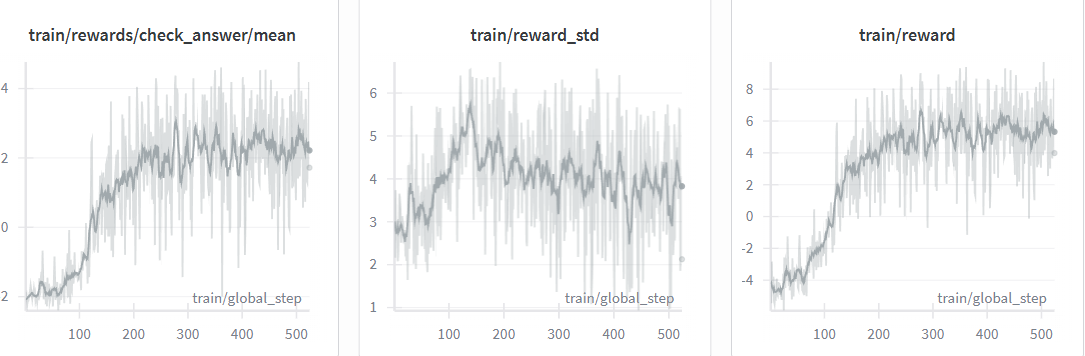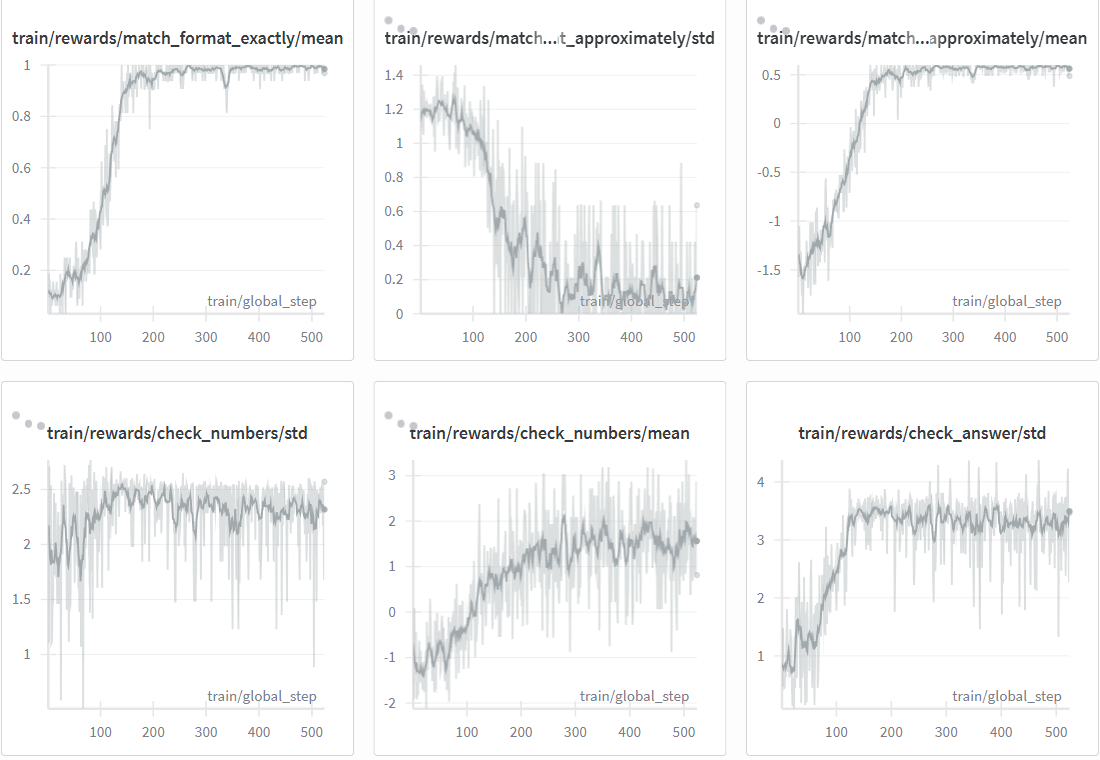